In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 3d using matplotlib bar3d

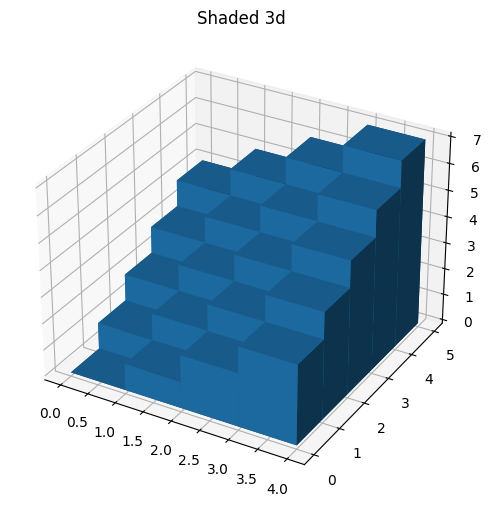

In [2]:
# setup the figure and axes
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded 3d')

plt.show()

### Import some data into a dataframe

In [3]:
import pandas as pd
df = pd.read_excel('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/Power_prices.xlsx', sheet_name="Power prices",
                 skiprows=3, index_col='Name', parse_dates=True)

df.index.rename('Date', inplace=True)
print(df.shape)
df.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

### Cut the DataFrame down to a smaller size

In [ ]:
df_plot = df[ ['US Baseload Electricity 22', 'US Baseload Electricity 23', 'US Baseload Electricity 24'] ].resample('Y').mean()

df_plot

### Organise the data for bar3d 

In [ ]:
# the width and depth of the columns
width = depth = .8

# xrange = num rows, yrange = num cols
xrange = np.arange(df_plot.shape[0])
yrange = np.arange(df_plot.shape[1])

# return matrices from the two vectors
xpos, ypos = np.meshgrid(xrange, yrange)
xpos = xpos.flatten()
ypos = ypos.flatten()

## where the columns start (we're saying start at zero)
zpos = np.zeros(df_plot.shape).flatten()

## The height of the columns
dz = list(df_plot['US Baseload Electricity 22']) + list(df_plot['US Baseload Electricity 23'])\
     + list(df_plot['US Baseload Electricity 24'])

In [ ]:
plt.style.use('seaborn-white')

fig3 = plt.figure(figsize=(12, 8))

ax4 = fig3.add_subplot(111, projection='3d')

# set the ticks in the middle of the bars
ax4.set_xticks(xrange + width/2)
ax4.set_yticks(yrange + 0.7)

#ax4.bar3d(xpos,ypos,zpos,dx,dy,dz)
ax4.bar3d(xpos, ypos, zpos, width, depth, dz, shade=True)

# put the column / index labels
ax4.w_yaxis.set_ticklabels(df_plot.columns)
ax4.w_xaxis.set_ticklabels(df_plot.index.format(date_format='%Y'))

plt.show()